# Scaling analysis of Nexa on Wall Street
Here I will present a scaling analysis of Nexa wall street with regards to the number of clusters in the sensors  space and the number of clusters in the data space.

#### Load the libraries

In [1]:
import numpy as np
import h5py
from sklearn import svm, cross_validation

#### Load database, letters and main parameters

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_big.hdf5'
f = h5py.File(file_location, 'r')

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

#### Prediction loop

In [3]:
N = 5000  # Amount of data
delay = 5
Nembedding = 3 

# Quantities to scale
time_clustering_collection = np.arange(5, 55, 5)
spatial_clustering_collection = np.arange(3, 11, 1)

N_time_clusters = time_clustering_collection.size
N_spatial_clusters = spatial_clustering_collection.size
accuracy = np.zeros((N_time_clusters, N_spatial_clusters))

In [4]:
for spatial_index, Nspatial_clusters in enumerate(spatial_clustering_collection):
    for time_index, Ntime_clusters in enumerate(time_clustering_collection):
        run_name = '/low-resolution'
        parameters_string = '/' + str(Nspatial_clusters)
        parameters_string += '-' + str(Ntime_clusters)
        parameters_string += '-' + str(Nembedding)

        nexa = f[run_name + parameters_string]

        # Now we load the time and the code vectors
        code_vectors = nexa['code-vectors']
        code_vectors_distance = nexa['code-vectors-distance']
        code_vectors_softmax = nexa['code-vectors-softmax']
        code_vectors_winner = nexa['code-vectors-winner']

        # Make prediction with scikit-learn

        X = code_vectors_winner[:(N - delay)]
        y = letters_sequence[delay:N]
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)
        clf = svm.SVC(C=1.0, cache_size=200, kernel='linear')
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test) * 100.0
        print(parameters_string)
        print('SVM score', score)
        accuracy[time_index, spatial_index] = score

/3-5-3
SVM score 33.8
/3-10-3
SVM score 78.6
/3-15-3
SVM score 40.2
/3-20-3
SVM score 56.8
/3-25-3
SVM score 91.4
/3-30-3
SVM score 62.8
/3-35-3
SVM score 96.6
/3-40-3
SVM score 65.6
/3-45-3
SVM score 99.2
/3-50-3
SVM score 98.6
/4-5-3
SVM score 45.0
/4-10-3
SVM score 78.4
/4-15-3
SVM score 53.4
/4-20-3
SVM score 88.6
/4-25-3
SVM score 60.8
/4-30-3
SVM score 81.8
/4-35-3
SVM score 96.6
/4-40-3
SVM score 71.4
/4-45-3
SVM score 98.8
/4-50-3
SVM score 99.2
/5-5-3
SVM score 40.2
/5-10-3
SVM score 60.2
/5-15-3
SVM score 85.0
/5-20-3
SVM score 63.0
/5-25-3
SVM score 65.8
/5-30-3
SVM score 98.2
/5-35-3
SVM score 84.6
/5-40-3
SVM score 98.6
/5-45-3
SVM score 97.4
/5-50-3
SVM score 76.4
/6-5-3
SVM score 51.6
/6-10-3
SVM score 75.4
/6-15-3
SVM score 90.6
/6-20-3
SVM score 77.2
/6-25-3
SVM score 94.2
/6-30-3
SVM score 76.2
/6-35-3
SVM score 96.8
/6-40-3
SVM score 95.0
/6-45-3
SVM score 98.0
/6-50-3
SVM score 98.8
/7-5-3
SVM score 54.2
/7-10-3
SVM score 78.6
/7-15-3
SVM score 92.4
/7-20-3
SVM scor

#### Plot the result

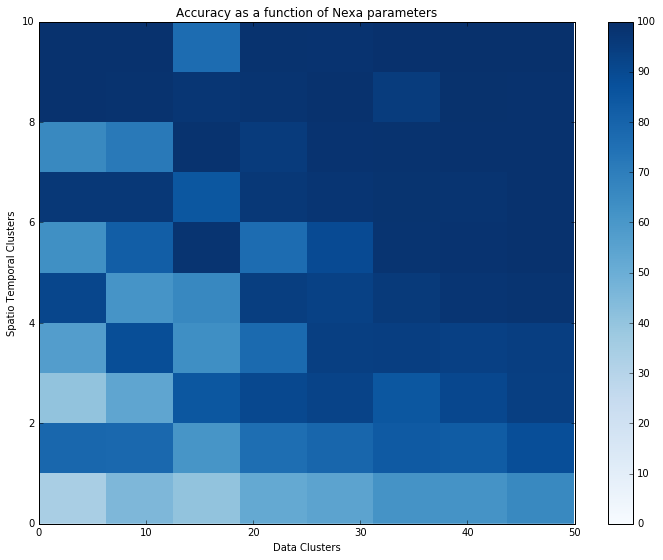

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

colormap = 'Blues'
origin = 'lower'
interpolation = 'none'

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(gs[:, :])
im = ax.imshow(accuracy, origin=origin, interpolation=interpolation, aspect='auto',
              extent=[0, Ntime_clusters, 0, Nspatial_clusters], vmin=0, vmax=100,
                  cmap=colormap)
fig.colorbar(im)
ax.set_xlabel('Data Clusters')
ax.set_ylabel('Spatio Temporal Clusters')
ax.set_title('Accuracy as a function of Nexa parameters')

#### Plot sample axis

(10, 8)


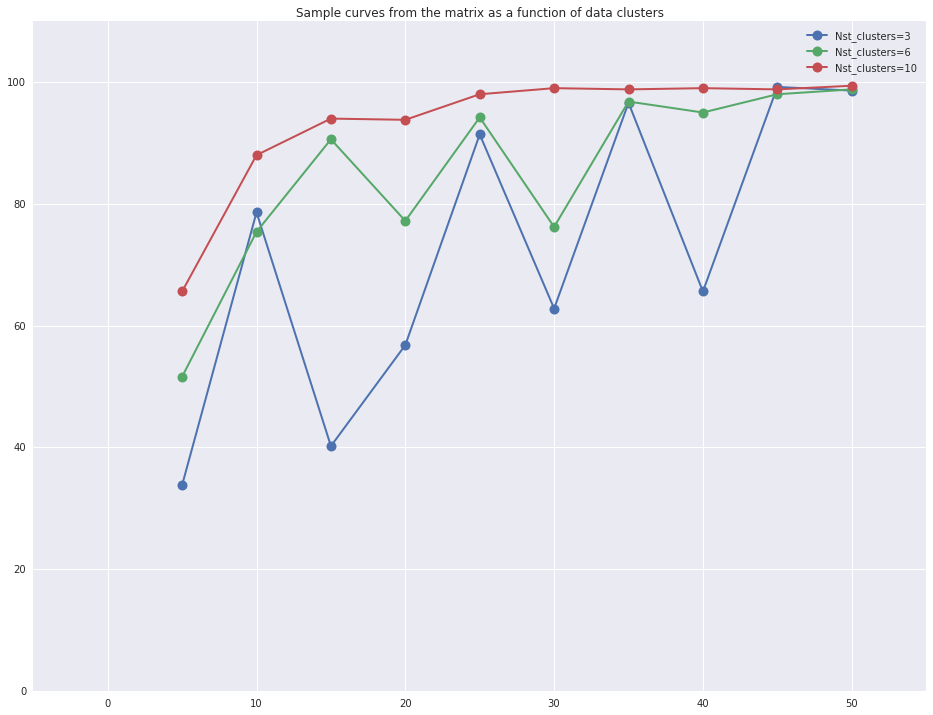

In [22]:
import seaborn as sns
value1 = 0
value2 = 3
value3 = 7

print(accuracy.shape)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(time_clustering_collection, accuracy[:, value1],'o-', lw=2, markersize=10, label='Nst_clusters='+ str(value1 + 3))
ax.plot(time_clustering_collection, accuracy[:, value2],'o-', lw=2, markersize=10, label='Nst_clusters='+ str(value2 + 3))
ax.plot(time_clustering_collection, accuracy[:, value3],'o-', lw=2, markersize=10, label='Nst_clusters='+ str(value3 + 3))

ax.set_xlim(-5, 55)
ax.set_ylim(0, 110)
ax.set_title('Sample curves from the matrix as a function of data clusters')
ax.legend()

(10, 8)


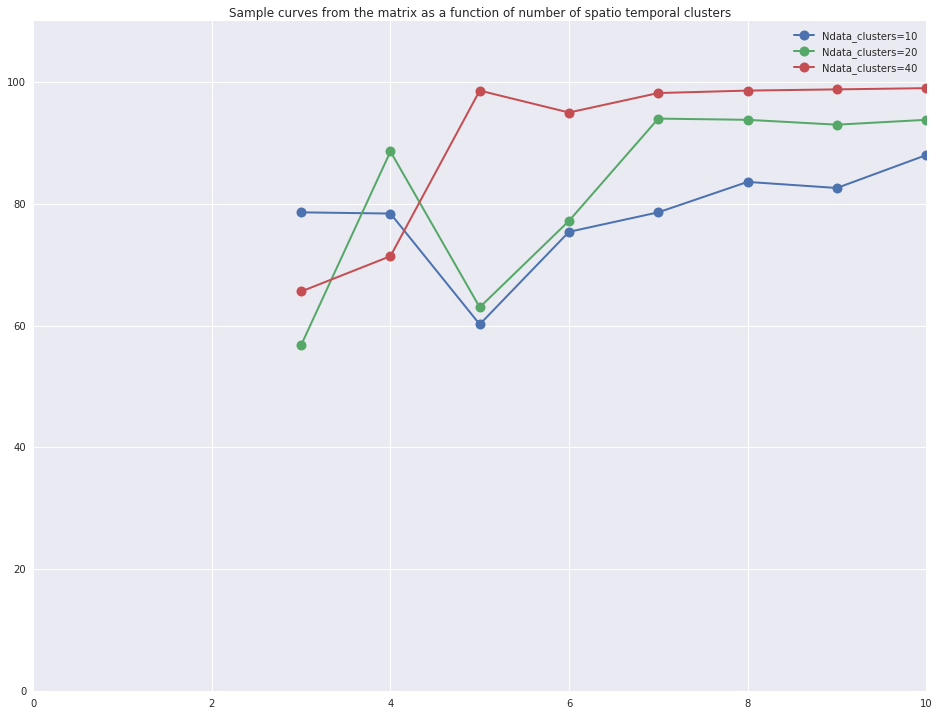

In [30]:
value1 = 1
value2 = 3
value3 = 7

print(accuracy.shape)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(spatial_clustering_collection, accuracy[value1, :],'o-', lw=2, markersize=10, label='Ndata_clusters='+ str((value1*5)+5))
ax.plot(spatial_clustering_collection, accuracy[value2, :],'o-', lw=2, markersize=10, label='Ndata_clusters='+ str((value2*5)+5))
ax.plot(spatial_clustering_collection, accuracy[value3, :],'o-', lw=2, markersize=10, label='Ndata_clusters='+ str((value3*5)+5))


ax.set_xlim(0, 10)
ax.set_ylim(0, 110)
ax.set_title('Sample curves from the matrix as a function of number of spatio temporal clusters')
ax.legend()

#### Now with seaborn

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


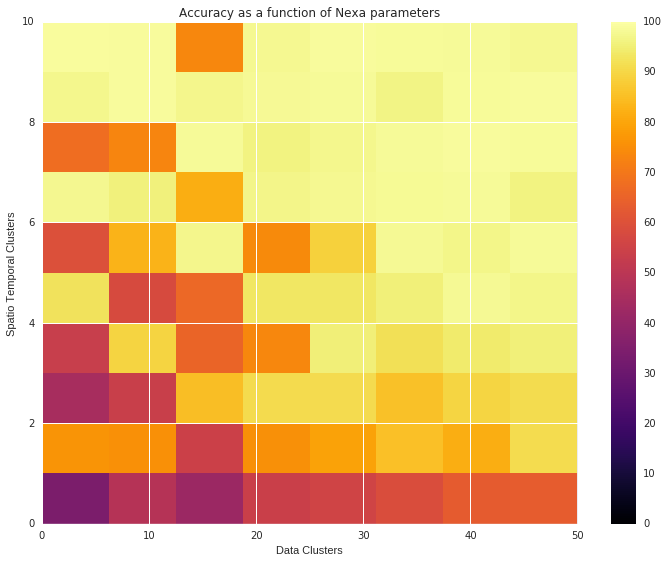

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set(rc={'image.cmap': 'inferno'})
%matplotlib inline

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(gs[:, :])
im = ax.imshow(accuracy, origin='lower', interpolation='none', aspect='auto',
          extent=[0, Ntime_clusters, 0, Nspatial_clusters], vmin=0, vmax=100)
fig.colorbar(im)
ax.set_xlabel('Data Clusters')
ax.set_ylabel('Spatio Temporal Clusters')
ax.set_title('Accuracy as a function of Nexa parameters')